In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [52]:
with open('input101.txt','r') as f:
    rawdata = f.readlines()
    s = np.array([int(r.strip('\n')) for r in rawdata])
    
with open('output101_functional_sim.txt','r') as f:
    rawdata = f.readlines()
    y = np.array([int(r.strip('\n')) for r in rawdata

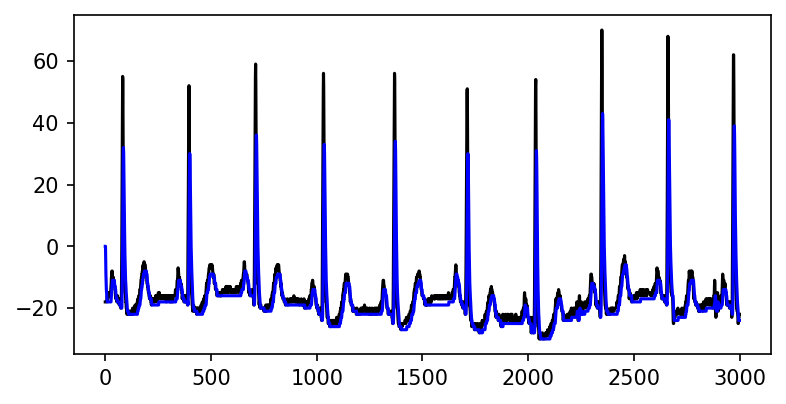

In [54]:
plt.figure(dpi=150,figsize=(6,3))
plt.plot(s,'k',label='input')
plt.plot(y,'b',label='output')
plt.show()

difference equation form implemented on the fpga

$$ y_n = y_{n-1} + \alpha \cdot (x_n - y_{n-1}) $$

applying z-transform to get the discrete transfer function representation...

$$ H(z) = \frac{\alpha}{1 + (\alpha - 1)\cdot z^{-1}} $$

we then apply filter to the input signal using scipy.lfilter...

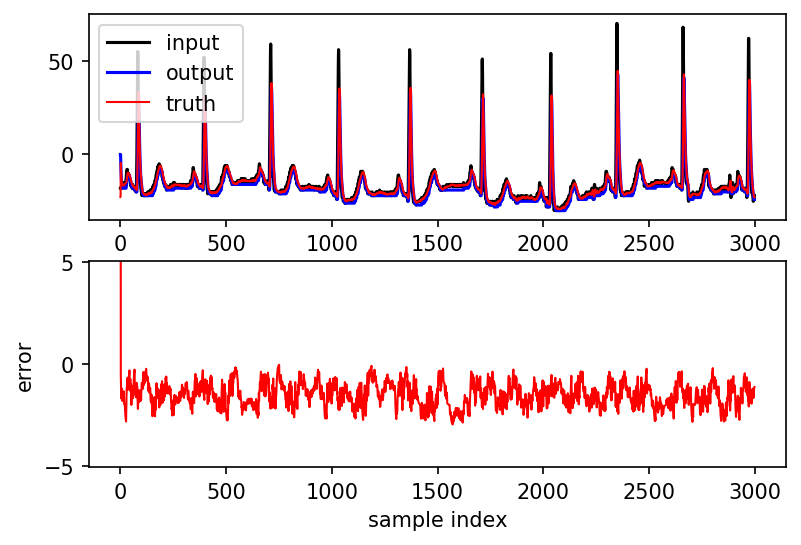

In [96]:
alpha = 1/2**2 #the correct scaling in the vhdl code
num = [alpha]
den = [1,alpha-1]
yr = signal.lfilter(num,den,s.astype(np.float))
yr = np.roll(yr,2) #why 2 samples?

fig, ax = plt.subplots(2,1,dpi=150,figsize=(6,4))
ax[0].plot(s,'k',label='input')
ax[0].plot(y,'b',label='output')
ax[0].plot(yr,'r',linewidth=1,label='truth')
ax[0].legend()

ax[1].plot(y-yr,'r',linewidth=1)
ax[1].set_ylim([np.std(y-yr)*-6,np.std(y-yr)*6])
ax[1].set_ylabel('error')
ax[1].set_xlabel('sample index')
plt.show()

some comments: 
1. why is there a DC offset in the error?
2. why does the truth truth have to be shifted by 2 samples to match the output?